In this notebook we'll be implementing a nonlinear regression onto a series of normal distributions. We will regress accelerometer readings onto time.

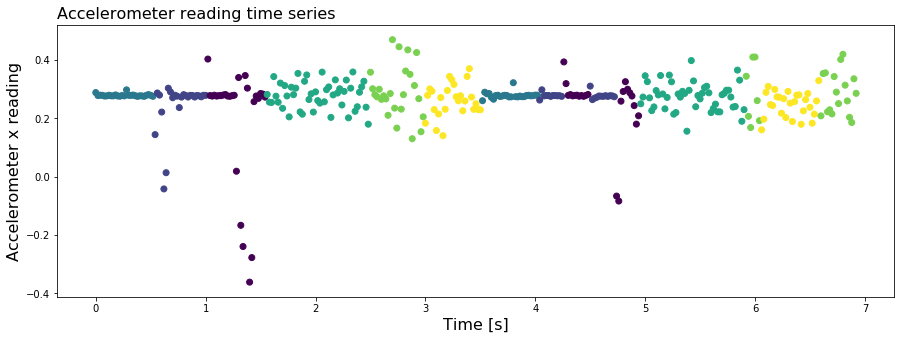

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

activity_data = pd.read_csv('.\\data\\human-activity-recognition\\train.csv')
sampling_interval = 0.02
activity_data         = activity_data[activity_data.subject == 1]
activity_data         = activity_data[['tBodyAcc-mean()-X', 'Activity']]
activity_data.columns = ['zAcc', 'Activity']
activity_data['Time'] = [0.02*i for i in range(len(activity_data))]
le = LabelEncoder()
activity_data['Activity'] = le.fit_transform(activity_data['Activity'])

# Plot the raw data
plt.figure(figsize = (15, 5))
plt.scatter(activity_data['Time'], activity_data['zAcc'], c = activity_data['Activity']);
plt.xlabel('Time [s]', fontsize = 16); plt.ylabel('Accelerometer x reading', fontsize = 16);
plt.title('Accelerometer reading time series', loc = 'left', fontsize = 16);

In this model we're going to fit a collection of Gaussians. That is, for each input element $x_i$, we're going to compute a vector;
$$
z_i^T = \Bigg[\exp\Big(-\frac{(x_i - \alpha_1)^2}{\lambda}\Big), \quad ..., \quad \exp\Big(-\frac{(x_i - \alpha_m)^2}{\lambda}\Big)\Bigg]\\[0.5em]
$$
We assume that the relationship between this vector and the response $w$ is linear:
$$
    \text{Pr}(w_i \ | \ x_i) = \text{Norm}_w[\phi z_i, \  \sigma^2 I]\\[0.5em]
$$
Then fit the weightings $\phi$ via maximum likelihood - by differentiating the above w.r.t. $\phi$ and $\sigma^2$ and setting equal to zero we find:
$$
    \hat{\phi} = (Z Z^T)^{-1}Z w\\[0.5em]
    \hat{\sigma}^2 = \frac{(w - Z^T \phi)^T(w - Z^T \phi)}{I}
$$
Where $Z = [z_1, ..., z_I]$.

To begin with, we'll define the bandwidth $\lambda$ and locations $\alpha_i$ of the kernels. Later, we'll look at fitting these too. To begin with, we won't use a kernel. Once we've done it the inefficient way, then we can do it the efficient way.

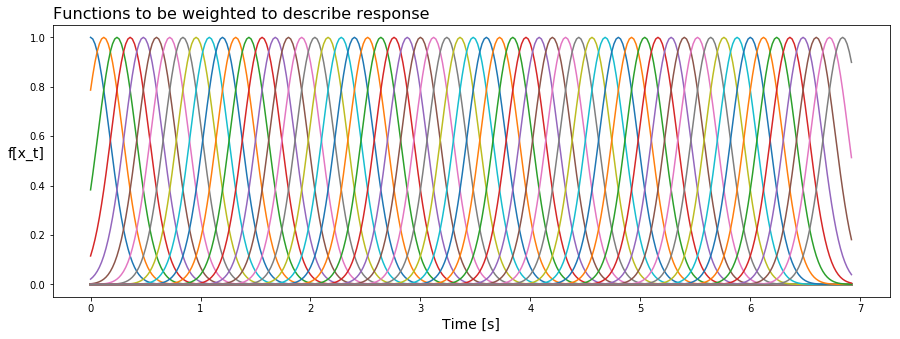

In [128]:
# Define input and reponse
x = activity_data['Time'].values
w = np.mat(activity_data['zAcc'].values).T

# Plot the distributions
plt.figure(figsize = (15, 5))
for dst in Z:
    plt.plot(x, dst.T);
plt.title('Functions to be weighted to describe response', fontsize = 16, loc = 'left')
plt.xlabel('Time [s]', fontsize = 14); plt.ylabel('f[x_t]', fontsize = 14, rotation = 0);
plt.show()

We assume that the relationship between the gaussian kernel of the time value and the response is linear: the expected response at a given time is some weighted combination of the kernels shown.

In [179]:
def f(x, lam, alpha):
    # Accepts a scalar input, returns a column vector (np.mat) of length = len(alpha)
    # lam -> bandwidth -> scalar
    # alpha -> locations -> vector
    z = [np.exp(-(x - alpha[i])**2 / lam) for i in range(len(alpha))]
    return z
    
# Compute nonlinear transformation of input
bandwidth = np.max(x)/40
locations = np.arange(0, np.max(x), bandwidth)
Z = np.mat([f(x_i, bandwidth, locations) for x_i in x]).T # Columns correspond to f[x_i] where i is column number

In [180]:
# Fit the model
phi      = np.linalg.inv(Z * Z.T) * Z * w
sigma_sq = (w - Z.T * phi).T * (w - Z.T * phi) / len(w)

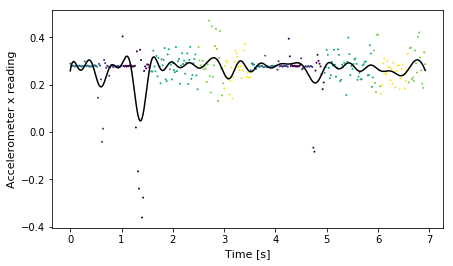

In [194]:
# Plot the results
plt.figure(figsize = (7, 4))
plt.scatter(activity_data['Time'], activity_data['zAcc'], c = activity_data['Activity'], s = 1);
plt.xlabel('Time [s]', fontsize = 11); plt.ylabel('Accelerometer x reading', fontsize = 11)
plt.plot(x, Z.T * phi, c = 'k'); plt.savefig('nonlinear_regression.pdf', pointsize= 400);

In [177]:
# Why does the fit go supernova for small bandwidths/intervals?
bandwidth = sampling_interval
for locs in [np.arange(0, np.max(x), np.max(x)/k) for k in np.arange(1, len(x))]:
        Z = np.mat([f(x_i, bandwidth, locs) for x_i in x]).T # Columns correspond to f[x_i] where i is column number
        phi      = np.linalg.inv(Z * Z.T) * Z * w
        print('# = {}, max = {}'.format(Z.shape[0], np.max(np.abs(phi))))

# = 1, max = 0.3840990732812093
# = 2, max = 0.38430728106277257
# = 3, max = 0.39901592738085173
# = 4, max = 0.3952124358433571
# = 5, max = 0.42535088132048127
# = 6, max = 0.39901592738084907
# = 7, max = 0.4049203576632947
# = 8, max = 0.4087577236852044
# = 9, max = 0.3990156717465929
# = 10, max = 0.425345934842779
# = 11, max = 0.4011165114712161
# = 12, max = 0.40788596627328244
# = 14, max = 0.4105757293292206
# = 14, max = 0.4035748787780432
# = 15, max = 0.42157576956236736
# = 16, max = 0.4022978282647738
# = 17, max = 0.40658925317075967
# = 18, max = 0.3968340416202701
# = 19, max = 0.3806956174065353
# = 20, max = 0.39163262755442974
# = 21, max = 0.37789893758094795
# = 22, max = 0.36896838082877886
# = 24, max = 0.3535107521626927
# = 24, max = 0.3536663331729269
# = 25, max = 0.35247199605833807
# = 27, max = 0.34156927723448915
# = 27, max = 0.35000946986845966
# = 28, max = 0.3488240805143132
# = 29, max = 0.34768971544342053
# = 30, max = 0.3466081503817098
# = 31

KeyboardInterrupt: 